In [115]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
#Učitavanje podataka (broj redova (primjera) i stupaca (značajki) te njihova imena (Pregnancies, Glucose, ...))

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [117]:
#Prikaz deskriptivne statistike (minimum, maksimum, aritmetička sredina...)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [118]:
#Broj jedinstvenih vrijednosti po značajkama

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [119]:
#Provjera tipova podataka (svi su numerički - olakšava rukovanje nad njima)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
#Provjera koliko podataka ima vrijednost NaN

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [121]:
#Značajka čije vrijednosti na prvi pogled jako odskaču je "Insulin" (mean + 3 * std = 425.5, a maksimalna vrijednost je 846)

print('Insulin >= 500: ', (df.Insulin >= 500).sum())
print('Insulin >= 600: ', (df.Insulin >= 600).sum())
print('Insulin >= 700: ', (df.Insulin >= 700).sum())
print('Insulin >= 800: ', (df.Insulin >= 800).sum())

Insulin >= 500:  9
Insulin >= 600:  4
Insulin >= 700:  2
Insulin >= 800:  1


Insulin >= 319:  34


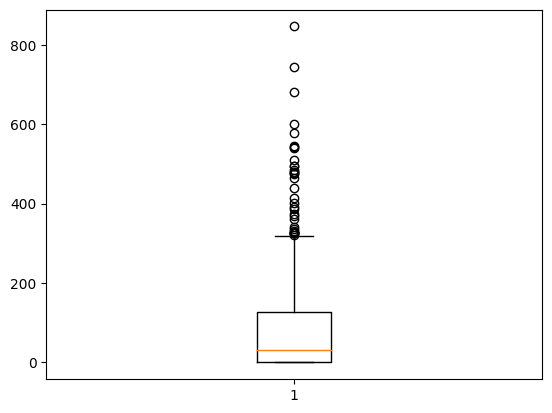

In [122]:
#Na kutijastom grafu se stršeće vrijednosti još bolje primjećuju
#Gornji "whisker" iznosi Q3 + 1.5 * (Q3 - Q1) = 318.125, tj. 319 jer je tip značajke insulin int64 -> 34 stršeće vrijednosti

plt.boxplot(df.Insulin)
print('Insulin >= 319: ', (df.Insulin >= 319).sum())

DPF > 1.2:  29


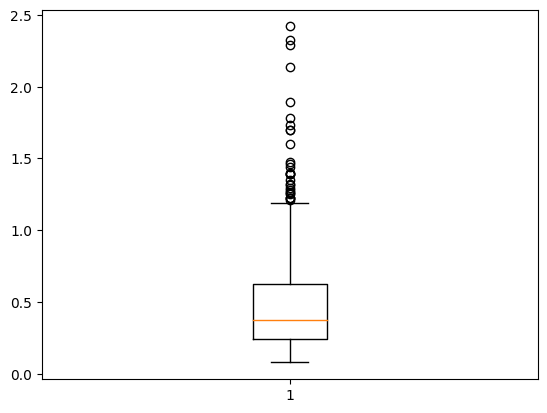

In [123]:
#Još jedna značajka čije vrijednosti značajno odskaču je "DiabetesPedigreeFunction" - 29 stršećih vrijednosti

plt.boxplot(df.DiabetesPedigreeFunction)
print('DPF > 1.2: ', (df.DiabetesPedigreeFunction > 1.2).sum())

Pregnancies >= 14:  4


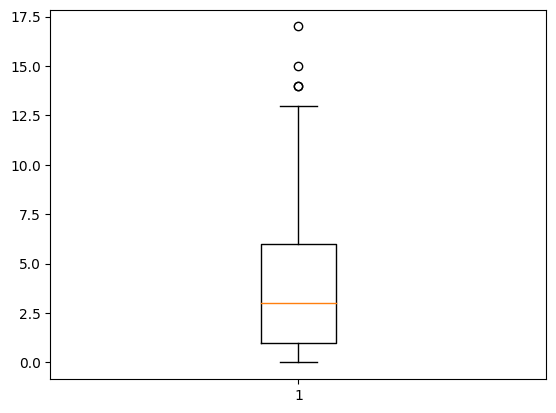

In [124]:
#Slijede kutijasti grafovi ostalih značajki - "Pregnancies" (4 stršeće vrijednosti)

plt.boxplot(df.Pregnancies)
print('Pregnancies >= 14: ', (df.Pregnancies >= 14).sum())


Skin Thickness >= 81:  1


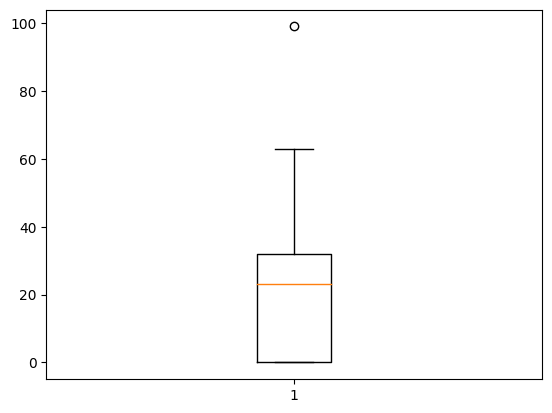

In [125]:
#Zatim značajka "SkinThickness" - 1 stršeća vrijednost

plt.boxplot(df.SkinThickness)
print('\nSkin Thickness >= 81: ', (df.SkinThickness >= 81).sum())

Age >= 67:  9


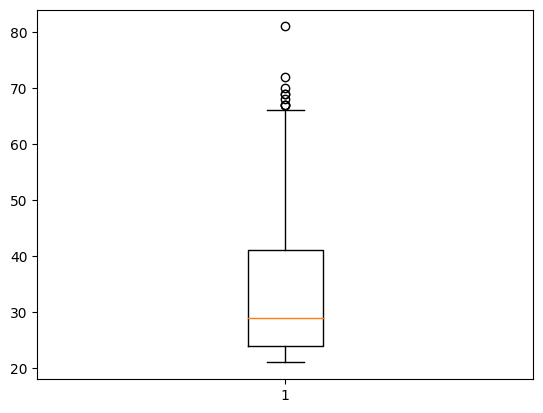

In [126]:
#Potom značajka "Age" - 9 stršećih vrijednosti

plt.boxplot(df.Age)
print('Age >= 67: ', (df.Age >= 67).sum())


BMI < 13.35:  11
BMI > 50.55:  8


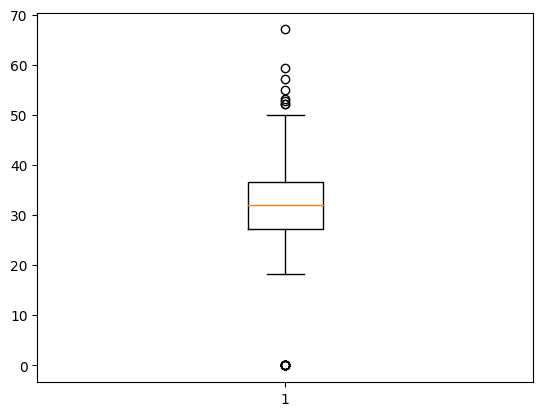

In [127]:
#Kod značajke "BMI" se nazire da postoje nedostajuće vrijednosti 0

plt.boxplot(df.BMI)
print('\nBMI < 13.35: ', (df.BMI < 13.35).sum())
print('BMI > 50.55: ', (df.BMI > 50.55).sum())

Glucose <= 37:  5


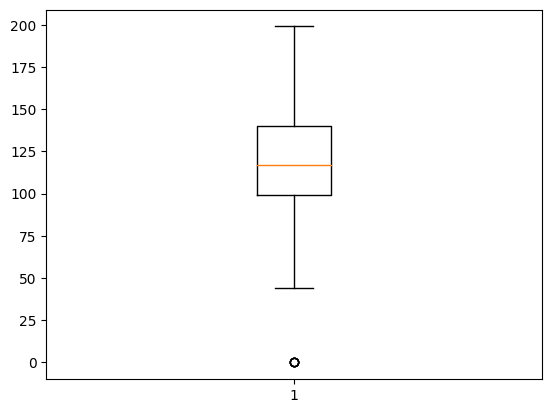

In [128]:
#Slično se može vidjeti i na grafu za značajku "Glucose"

plt.boxplot(df.Glucose)
print('Glucose <= 37: ', (df.Glucose <= 37).sum())

Blood Pressure <= 20:  35
Blood Pressure <= 34:  38
Blood Pressure >= 108:  7


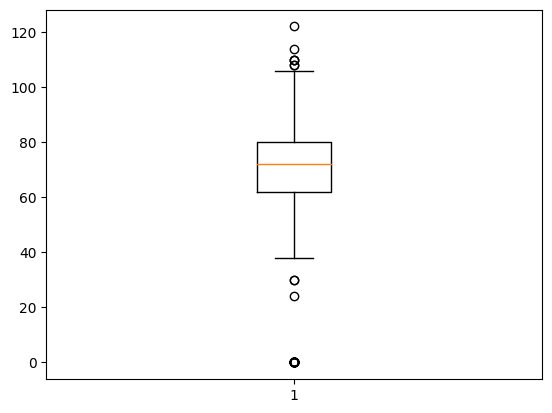

In [129]:
#Veći broj nedostajućih vrijednosti se pogotovo vidi na grafu značajke "Blood Pressure" - njih 35

plt.boxplot(df.BloodPressure)
print('Blood Pressure <= 20: ', (df.BloodPressure <= 20).sum())
print('Blood Pressure <= 34: ', (df.BloodPressure <= 34).sum())
print('Blood Pressure >= 108: ', (df.BloodPressure >= 108).sum())

In [130]:
#Ažuriranje nedostajućih vrijednosti na medijan

df_update = df.copy()

df_update.loc[df_update.Glucose == 0, 'Glucose'] = df_update.loc[:,'Glucose'].median()
df_update.loc[df_update.BloodPressure == 0, 'BloodPressure'] = df_update.loc[:,'BloodPressure'].median()
df_update.loc[df_update.SkinThickness == 0, 'SkinThickness'] = df_update.loc[:,'SkinThickness'].median()
df_update.loc[df_update.Insulin == 0, 'Insulin'] = df_update.loc[:,'Insulin'].median()
df_update.loc[df_update.BMI == 0, 'BMI'] = df_update.loc[:,'BMI'].median()

df = df_update

In [131]:
#Prikaz korelacijske matrice

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


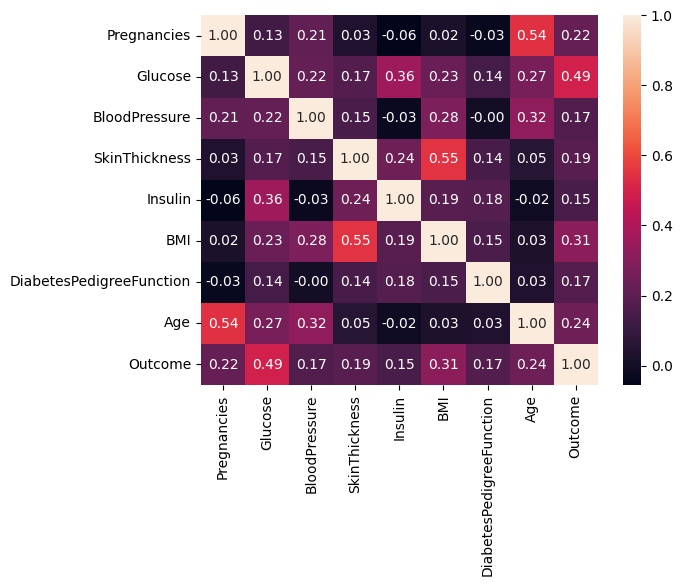

In [132]:
#Isti prikaz na toplinskoj mapi

sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

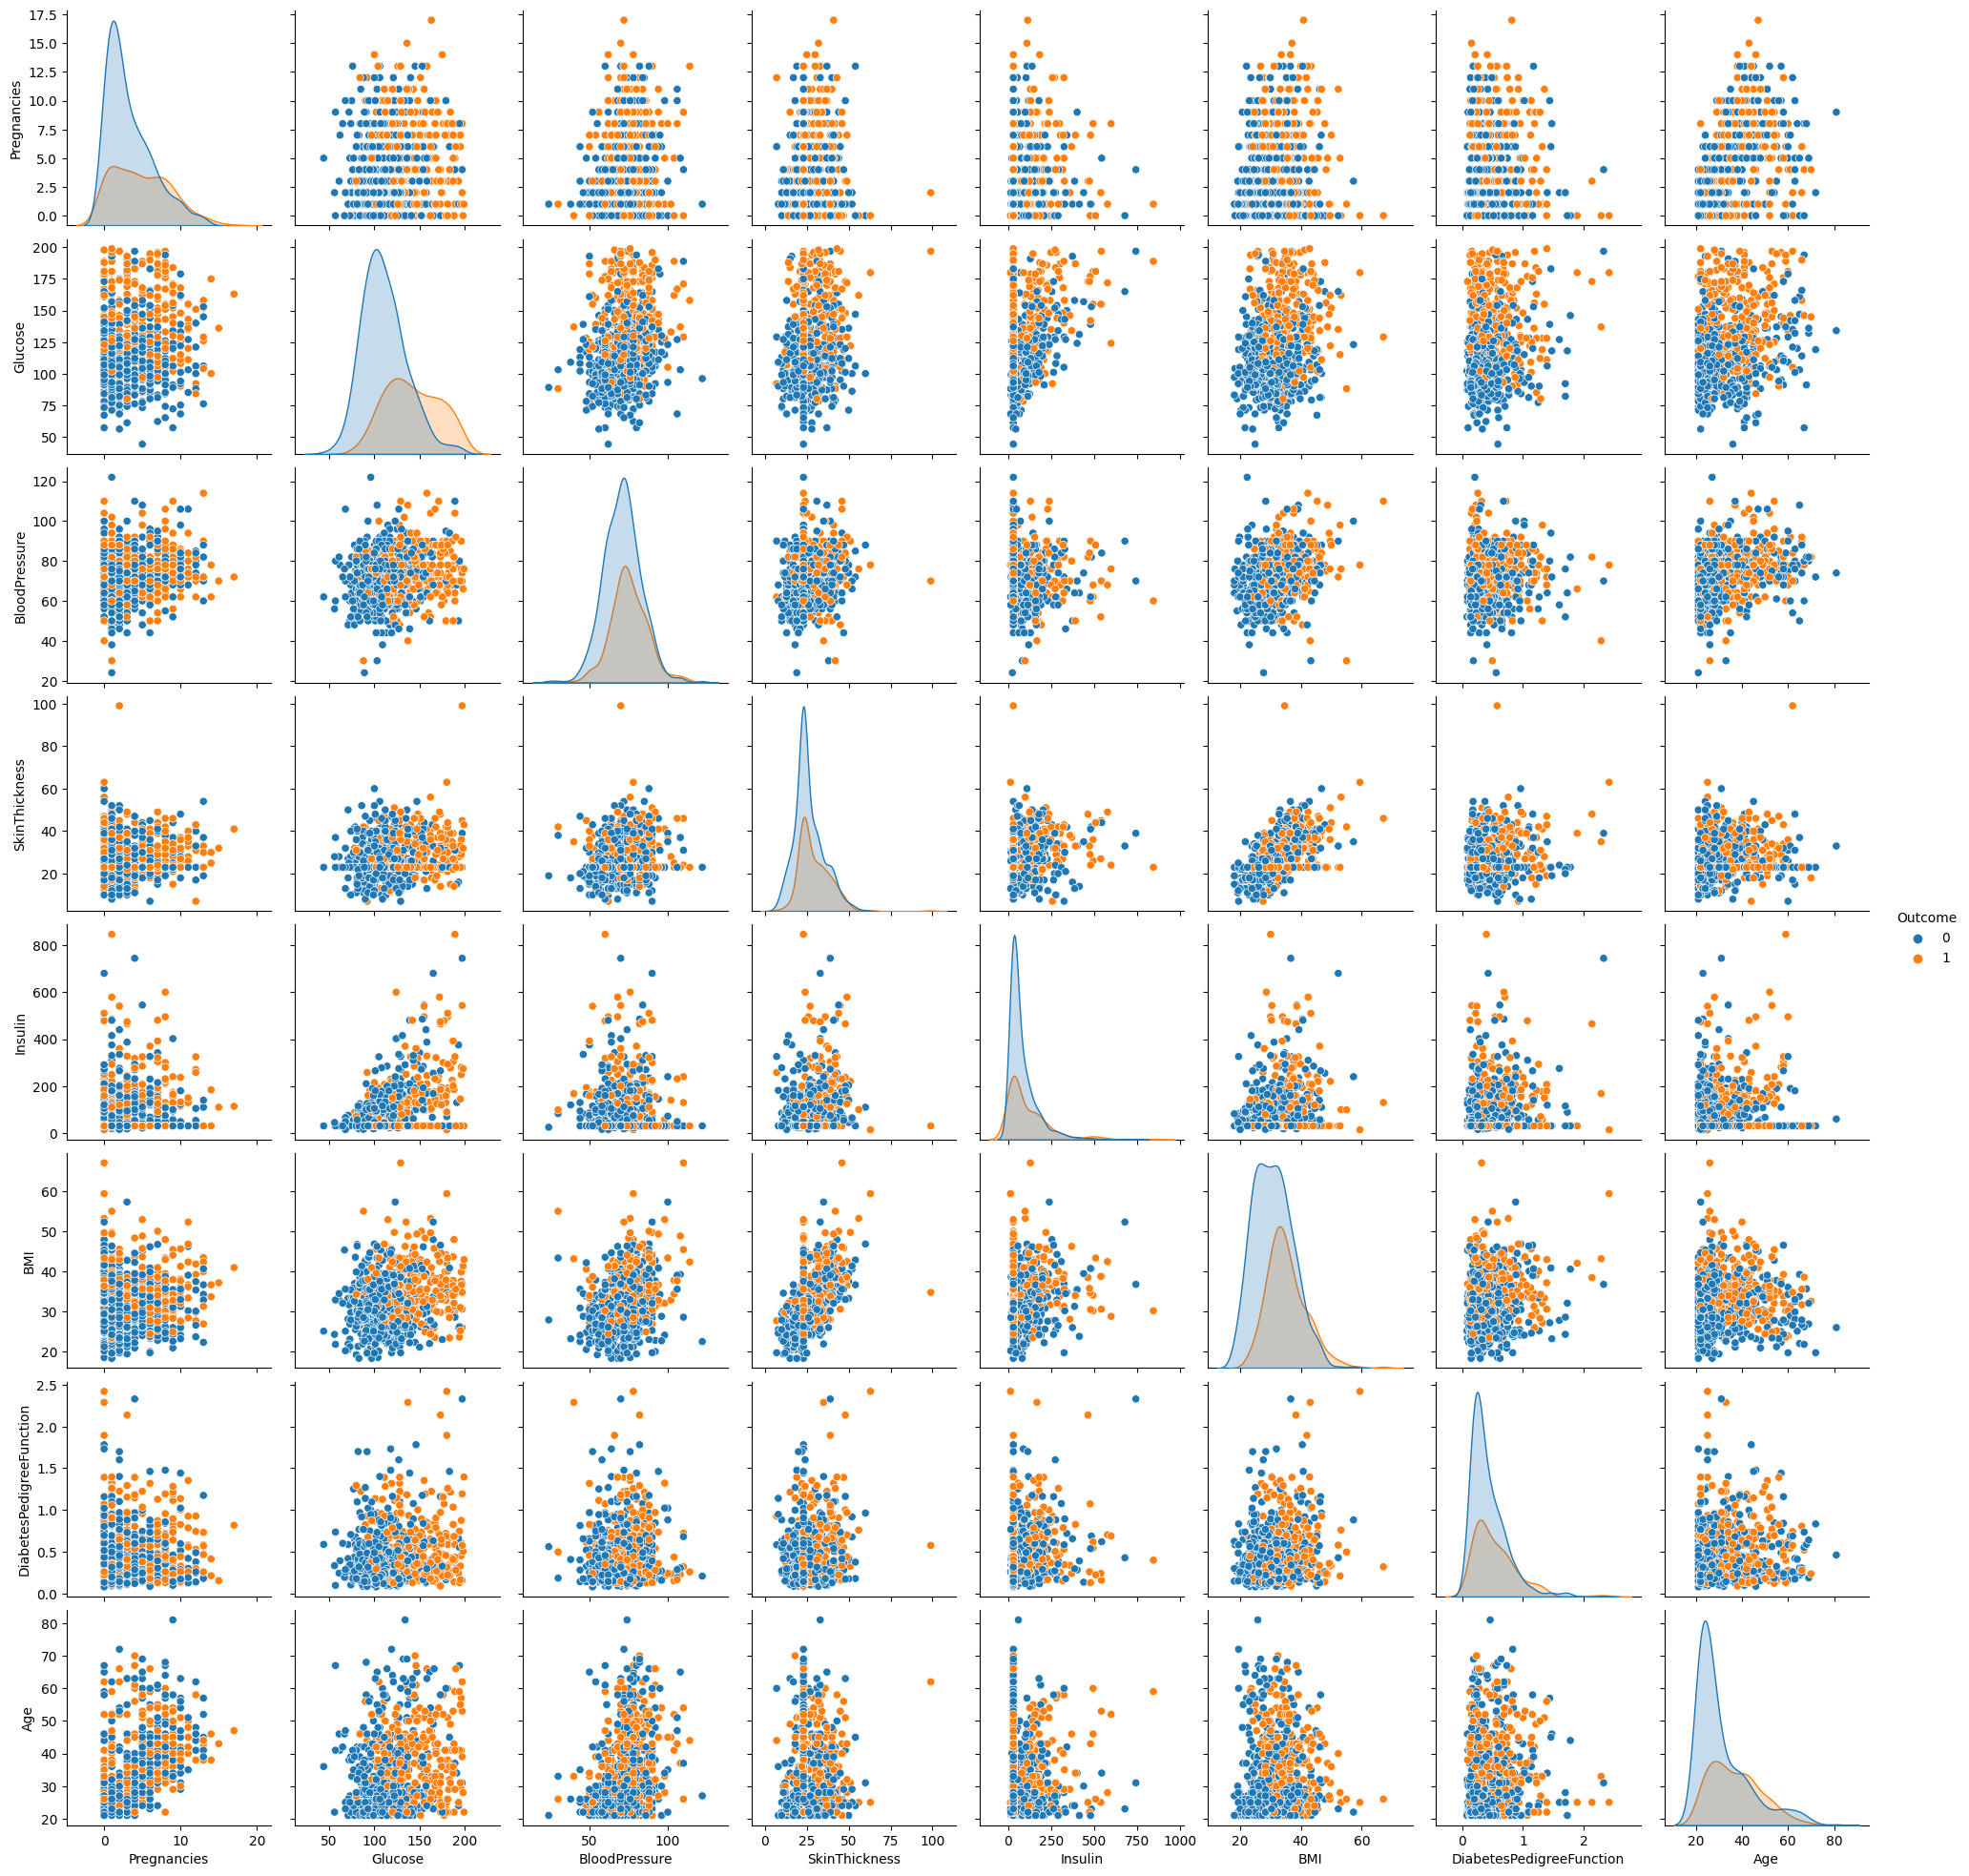

In [133]:
#Matrica dijagrama raspršenja, osobe s dijabetesom su obojane drugom bojom radi preglednosti

sns.pairplot(df, hue="Outcome")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7948f205bd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7948f0348280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7948f205ba60>,
 'medians': [<matplotlib.lines.Line2D at 0x7948f03487c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7948f0348a60>,
 'means': []}

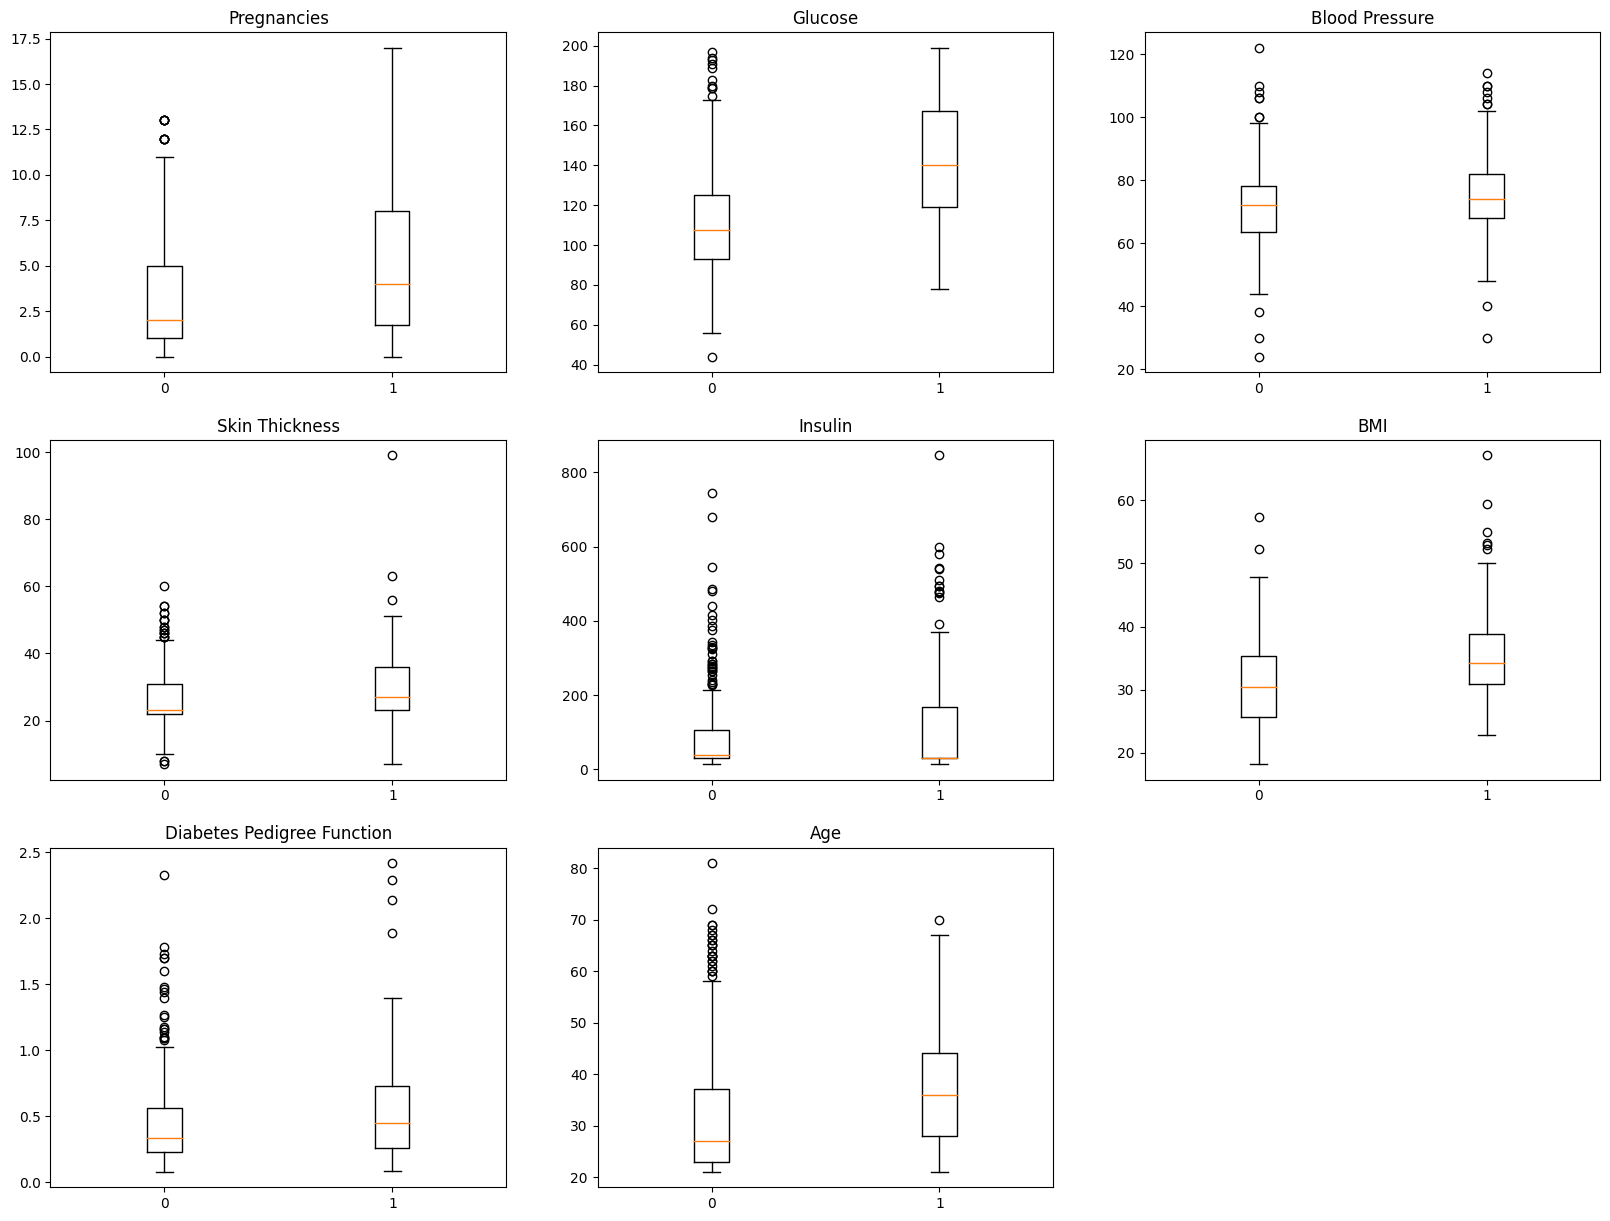

In [134]:
#Prikaz ovisnosti između dijabetesa i pojedinih značajki (0 - nema dijabetes, 1 - ima dijabetes)

diabetes_no = df.loc[df['Outcome'] == 0]
diabetes_yes = df.loc[df['Outcome'] == 1]

plt.figure(figsize = (20, 15))

plt.subplot(3, 3, 1)
plt.title("Pregnancies")
plt.boxplot([diabetes_no.Pregnancies, diabetes_yes.Pregnancies], labels = ['0', '1'])

plt.subplot(3, 3, 2)
plt.title("Glucose")
plt.boxplot([diabetes_no.Glucose, diabetes_yes.Glucose], labels = ['0', '1'])

plt.subplot(3, 3, 3)
plt.title("Blood Pressure")
plt.boxplot([diabetes_no.BloodPressure, diabetes_yes.BloodPressure], labels = ['0', '1'])

plt.subplot(3, 3, 4)
plt.title("Skin Thickness")
plt.boxplot([diabetes_no.SkinThickness, diabetes_yes.SkinThickness], labels = ['0', '1'])

plt.subplot(3, 3, 5)
plt.title("Insulin")
plt.boxplot([diabetes_no.Insulin, diabetes_yes.Insulin], labels = ['0', '1'])

plt.subplot(3, 3, 6)
plt.title("BMI")
plt.boxplot([diabetes_no.BMI, diabetes_yes.BMI], labels = ['0', '1'])

plt.subplot(3, 3, 7)
plt.title("Diabetes Pedigree Function")
plt.boxplot([diabetes_no.DiabetesPedigreeFunction, diabetes_yes.DiabetesPedigreeFunction], labels = ['0', '1'])

plt.subplot(3, 3, 8)
plt.title("Age")
plt.boxplot([diabetes_no.Age, diabetes_yes.Age], labels = ['0', '1'])

In [135]:
#Standardizacija podataka

df['Pregnancies'] = stats.zscore(df['Pregnancies'])
df['Glucose'] = stats.zscore(df['Glucose'])
df['BloodPressure'] = stats.zscore(df['BloodPressure'])
df['SkinThickness'] = stats.zscore(df['SkinThickness'])
df['Insulin'] = stats.zscore(df['Insulin'])
df['BMI'] = stats.zscore(df['BMI'])
df['DiabetesPedigreeFunction'] = stats.zscore(df['DiabetesPedigreeFunction'])
df['Age'] = stats.zscore(df['Age'])

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732,1


In [136]:
#Podjela na ulazne i izlazne varijable te na set za treniranje i testiranje modela

input = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'SkinThickness', 'BloodPressure', 'DiabetesPedigreeFunction']
X = df[input]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.7100 VS 0.7478
Precision: 0.5862 VS 0.7086
Sensitivity: 0.6220 VS 0.8843
Specificity: 0.7584 VS 0.5963
F1-score: 0.6036 VS 0.7868
AUC: 0.6902 VS 0.7855
Matrica zabune iz članka:
 [107, 44] 
 [14, 65]


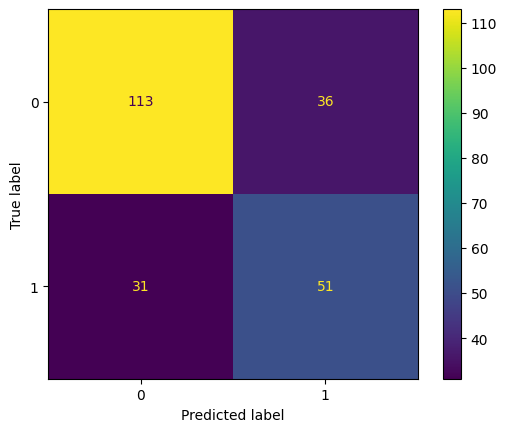

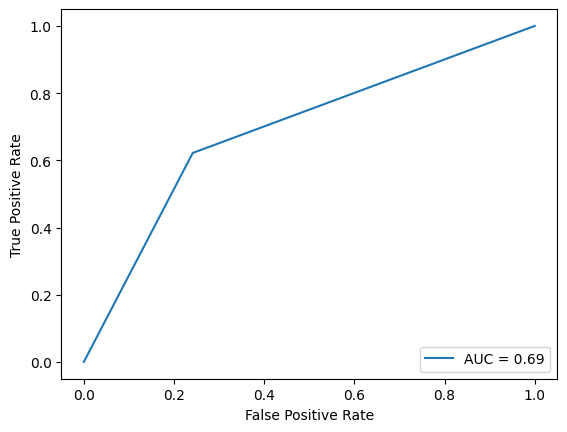

In [137]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7478)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.7086)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8843)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.5963)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.7868)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.7855)

cm = metrics.confusion_matrix(y_test, y_pred, labels = dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_).plot()

print("Matrica zabune iz članka:\n", [107, 44], "\n", [14, 65])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_dec_tree = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.7619 VS 0.7957
Precision: 0.7077 VS 0.894
Sensitivity: 0.5610 VS 0.8133
Specificity: 0.8725 VS 0.75
F1-score: 0.6259 VS 0.8517
AUC: 0.7167 VS 0.8624
Matrica zabune iz članka:
 [136, 15] 
 [28, 51]


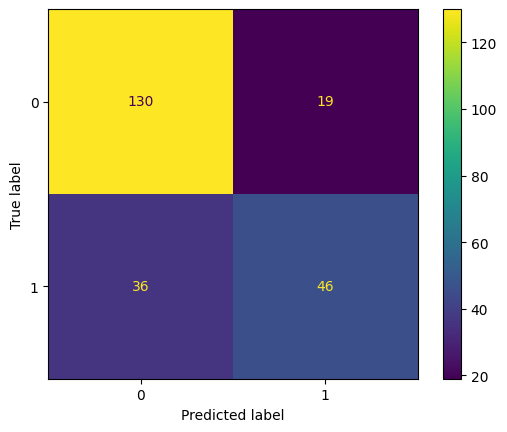

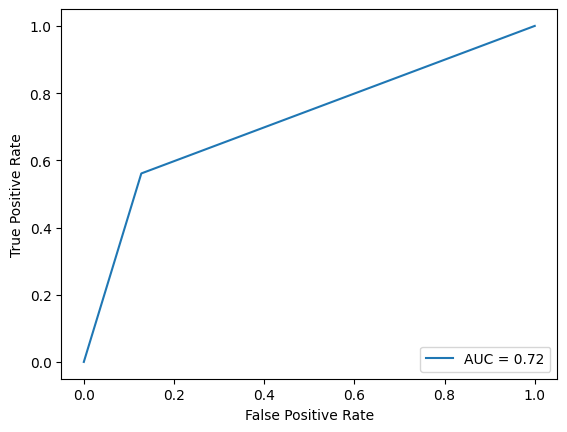

In [138]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7957)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.8940)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8133)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.7500)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.8517)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8624)

cm = metrics.confusion_matrix(y_test, y_pred, labels = rf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_).plot()

print("Matrica zabune iz članka:\n", [136, 15], "\n", [28, 51])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_rand_forest = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.7229 VS 0.7867
Precision: 0.6216 VS 0.8188
Sensitivity: 0.5610 VS 0.8675
Specificity: 0.8121 VS 0.6329
F1-score: 0.5897 VS 0.8424
AUC: 0.6865 VS 0.8463
Matrica zabune iz članka:
 [131, 29] 
 [20, 50]


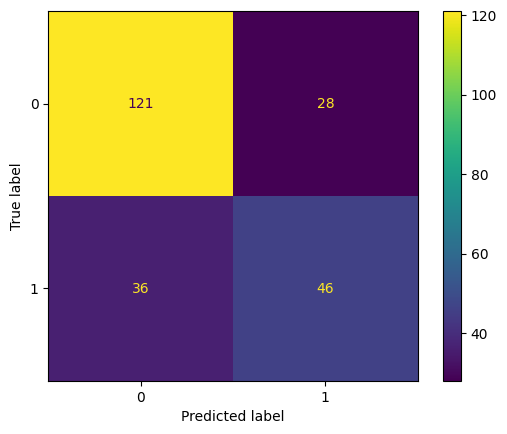

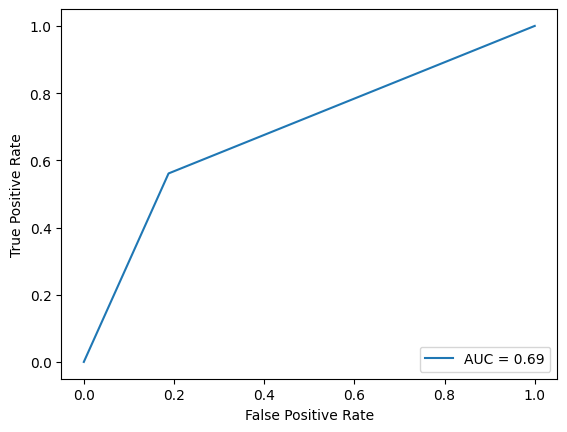

In [139]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7867)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.8188)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8675)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.6329)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.8424)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8463)

cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_).plot()

print("Matrica zabune iz članka:\n", [131, 29], "\n", [20, 50])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_gauss = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

In [140]:
#Podjela na ulazne i izlazne varijable te na set za treniranje i testiranje modela uz odabir značajki (3 najvažnije)

input = ['BMI', 'Age', 'Glucose']
X = df[input]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.6623 VS 0.7522
Precision: 0.5200 VS 0.702
Sensitivity: 0.4815 VS 0.8983
Specificity: 0.7600 VS 0.5982
F1-score: 0.5000 VS 0.7881
AUC: 0.6207 VS 0.8128
Matrica zabune iz članka:
 [106, 45] 
 [12, 67]


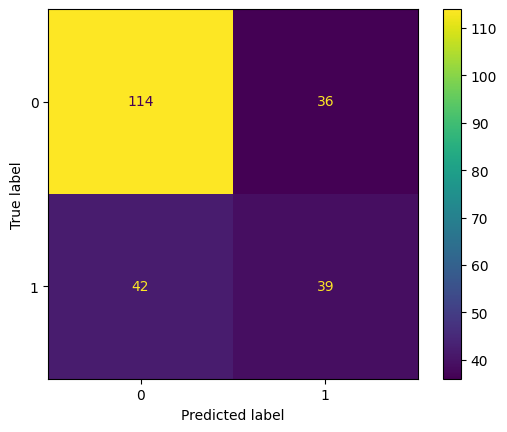

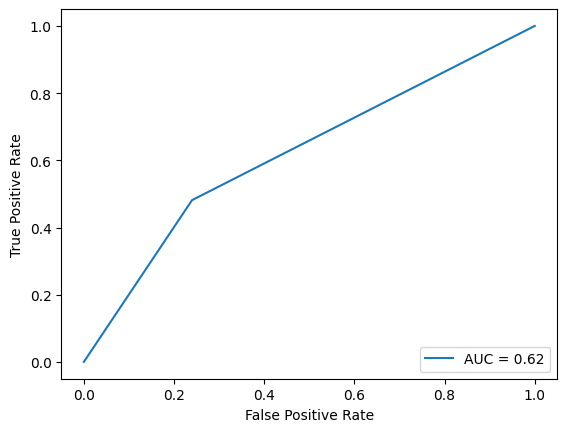

In [141]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7522)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.7020)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8983)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.5982)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.7881)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8128)

cm = metrics.confusion_matrix(y_test, y_pred, labels = dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_).plot()

print("Matrica zabune iz članka:\n", [106, 45], "\n", [12, 67])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_dec_tree = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.7186 VS 0.7522
Precision: 0.6212 VS 0.8212
Sensitivity: 0.5062 VS 0.8052
Specificity: 0.8333 VS 0.6447
F1-score: 0.5578 VS 0.8131
AUC: 0.6698 VS 0.8227
Matrica zabune iz članka:
 [123, 28] 
 [31, 48]


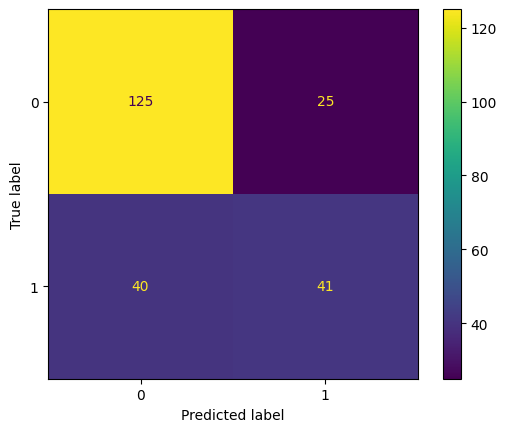

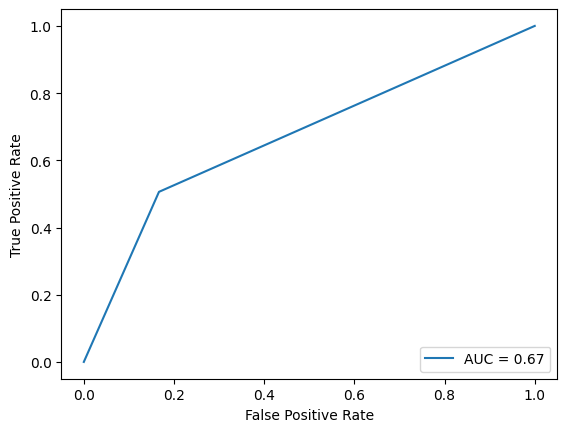

In [142]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7522)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.8212)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8052)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.6447)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.8131)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8227)

cm = metrics.confusion_matrix(y_test, y_pred, labels = rf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_).plot()

print("Matrica zabune iz članka:\n", [123, 28], "\n", [31, 48])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_rand_forest = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.7706 VS 0.7913
Precision: 0.7500 VS 0.816
Sensitivity: 0.5185 VS 0.8808
Specificity: 0.9067 VS 0.6203
F1-score: 0.6131 VS 0.8471
AUC: 0.7126 VS 0.8615
Matrica zabune iz članka:
 [133, 30] 
 [18, 49]


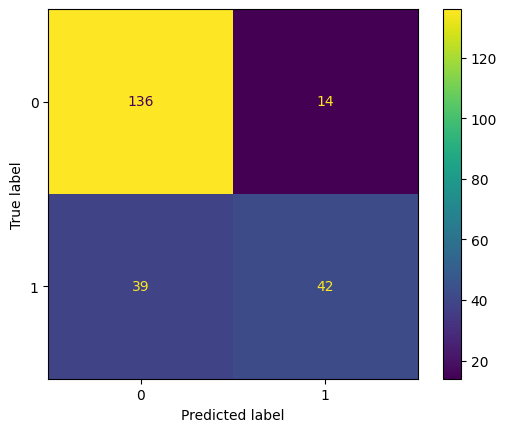

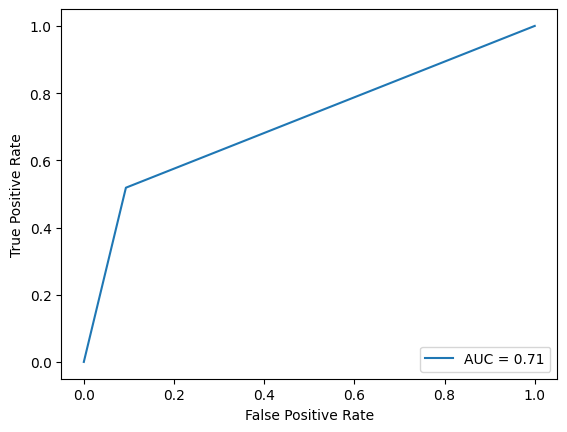

In [143]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7913)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.8160)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8808)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.6203)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.8471)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8615)

cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_).plot()

print("Matrica zabune iz članka:\n", [133, 30], "\n", [18, 49])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_gauss = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

In [144]:
#Podjela na ulazne i izlazne varijable te na set za treniranje i testiranje modela uz odabir značajki (5 najvažnijih)

input = ['BMI', 'Age', 'Glucose', 'Insulin', 'SkinThickness']
X = df[input]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.6407 VS 0.7565
Precision: 0.4396 VS 0.7086
Sensitivity: 0.5556 VS 0.8992
Specificity: 0.6792 VS 0.6036
F1-score: 0.4908 VS 0.7926
AUC: 0.6174 VS 0.8084
Matrica zabune iz članka:
 [107, 44] 
 [12, 67]


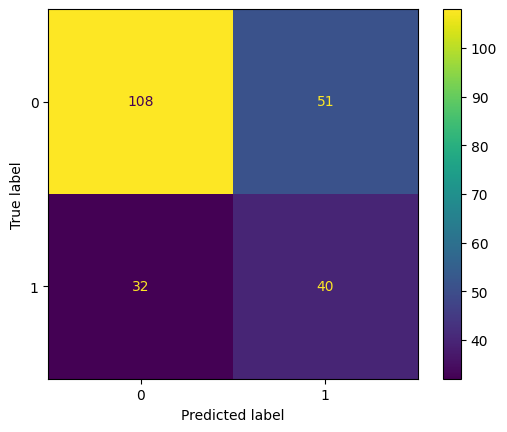

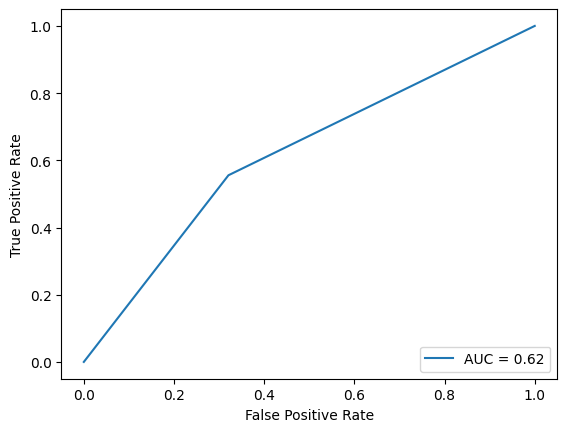

In [145]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7565)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.7086)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8992)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.6036)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.7926)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8084)

cm = metrics.confusion_matrix(y_test, y_pred, labels = dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_).plot()

print("Matrica zabune iz članka:\n", [107, 44], "\n", [12, 67])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_dec_tree = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.7359 VS 0.7391
Precision: 0.5714 VS 0.8079
Sensitivity: 0.6111 VS 0.7974
Specificity: 0.7925 VS 0.6234
F1-score: 0.5906 VS 0.8026
AUC: 0.7018 VS 0.8177
Matrica zabune iz članka:
 [121, 30] 
 [30, 49]


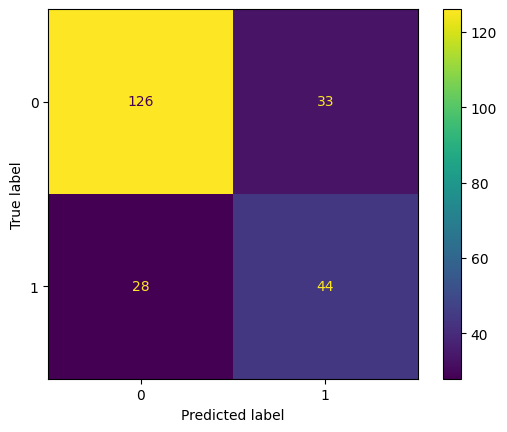

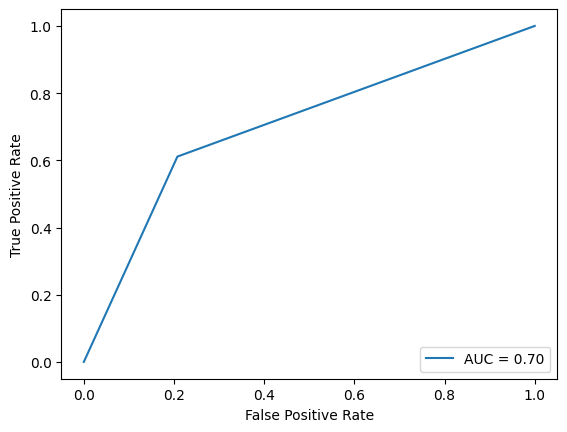

In [146]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7391)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.8079)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.7974)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.6234)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.8026)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8177)

cm = metrics.confusion_matrix(y_test, y_pred, labels = rf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_).plot()

print("Matrica zabune iz članka:\n", [121, 30], "\n", [30, 49])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_rand_forest = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

Usporedba rezultata s onima u članku (dobiveni VS člankovi):
Accuracy: 0.7662 VS 0.7783
Precision: 0.6364 VS 0.8125
Sensitivity: 0.5833 VS 0.8609
Specificity: 0.8491 VS 0.6203
F1-score: 0.6087 VS 0.836
AUC: 0.7162 VS 0.841
Matrica zabune iz članka:
 [130, 30] 
 [21, 49]


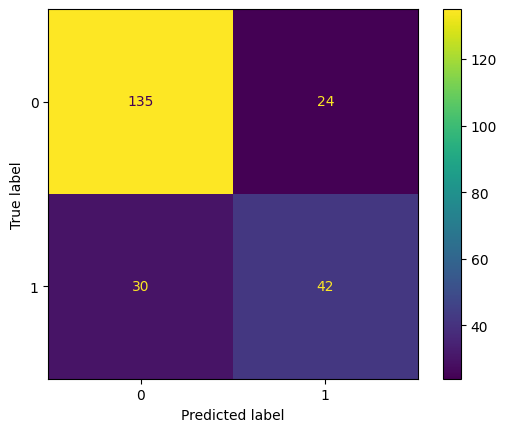

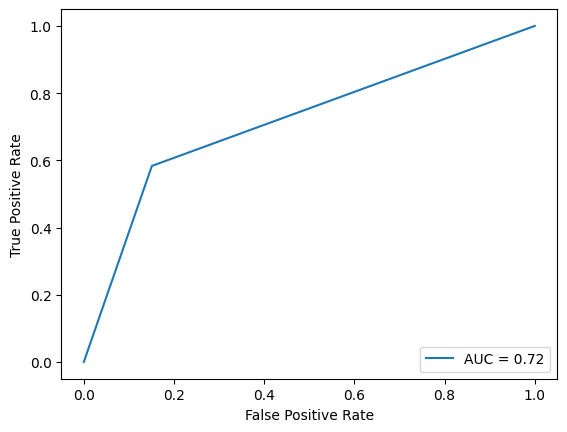

In [147]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Usporedba rezultata s onima u članku (dobiveni VS člankovi):")
print("Accuracy:", f'{metrics.accuracy_score(y_test, y_pred):.4f}', "VS", 0.7783)
print("Precision:", f'{metrics.precision_score(y_test, y_pred):.4f}', "VS", 0.8125)
print("Sensitivity:", f'{metrics.recall_score(y_test, y_pred):.4f}', "VS", 0.8609)
print("Specificity:", f'{metrics.recall_score(y_test, y_pred, pos_label = 0):.4f}', "VS", 0.6203)
print("F1-score:", f'{metrics.f1_score(y_test, y_pred):.4f}', "VS", 0.8360)
print("AUC:", f'{metrics.roc_auc_score(y_test, y_pred):.4f}', "VS", 0.8410)

cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_).plot()

print("Matrica zabune iz članka:\n", [130, 30], "\n", [21, 49])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
disp_gauss = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()